# Análise de Consumo de Animes: Gêneros, Países e Títulos Mais Assistidos

Problemas a serem resolvidos na análise:
* Qual é o gênero de anime mais assistido? Identificar o gênero com o maior número de horas assistidas no total.
* Qual país mais consome animes? Determinar qual país possui o maior tempo total de visualização de animes.
* Quais são os 10 animes mais assistidos? Listar os 10 animes com o maior número de horas assistidas entre todos os países.



Importação da Base de Dados

In [22]:
import Plotly.express as px 
import pandas as pd

BaseAnimes = pd.read_excel("Tabela_Animes.xlsx")
display(BaseAnimes)

,Name,Release_Date,Genre,Watch_Count,Total_Hours_Watched,Country_Most_Views
0,Attack on Titan,2017-12-11,Adventure,2449,2570.99,USA
1,Naruto,2023-11-06,Horror,4047,4402.73,Brazil
2,One Piece,2021-07-28,Shounen,3677,805.78,France
3,Demon Slayer,2018-09-29,Action,4752,1200.62,Germany
4,Fullmetal Alchemist,2022-03-27,Fantasy,1479,7128.31,France
5,Death Note,2015-10-02,Romance,1632,7561.66,USA
6,Jujutsu Kaisen,2020-02-06,Shounen,997,2632.83,Germany
7,My Hero Academia,2022-06-30,Fantasy,2321,7110.33,Germany
8,Bleach,2020-06-14,Romance,2157,4814.77,Germany
9,Tokyo Ghoul,2024-04-24,Comedy,773,853.18,Brazil


 # Análise aprofundada da base de dados, com o objetivo de extrair insights Para a solução dos desafios.

-----------------------------

# Qual é o gênero de anime mais assistido?

In [14]:
listaAnime = BaseAnimes[['Genre','Total_Hours_Watched']] \
    .groupby('Genre') \
    .sum() \
    .sort_values(by='Total_Hours_Watched', ascending=False)

display(listaAnime)
print("O gênero mais assistido é:", listaAnime.index[0])

,Total_Hours_Watched
Genre,
Adventure,16892.23
Comedy,14438.64
Fantasy,14238.64
Romance,12376.43
Horror,8788.39
Shounen,3438.61
Action,1200.62


O gênero mais assistido é: Adventure


--------------------------

# Qual país mais consome animes

In [24]:
# Agrupa país e soma as horas assistidas
listaAnime = BaseAnimes[['Country_Most_Views', 'Total_Hours_Watched']] \
    .groupby('Country_Most_Views') \
    .sum() \
    .sort_values(by='Total_Hours_Watched', ascending=False)
display(listaAnime)
print("O país que mais consome anime é:", listaAnime.index[0])


,Total_Hours_Watched
Country_Most_Views,
USA,30016.99
Germany,20144.21
Brazil,13278.27
France,7934.09


O país que mais consome anime é: USA


-------------------

# Quais são os 10 animes mais assistidos

In [25]:
# colunas necessárias
colunas = ['Name', 'Total_Hours_Watched', 'Country_Most_Views']
top_10_animes = BaseAnimes[colunas] \
    .sort_values(by='Total_Hours_Watched', ascending=False) \
    .head(10)

# Exibe os 10 animes mais assistidos
display(top_10_animes)
print("Top 10 animes mais assistidos:")
for i, row in top_10_animes.iterrows():
    print(f"{row['Name']} - {row['Total_Hours_Watched']:.2f} horas")


,Name,Total_Hours_Watched,Country_Most_Views
14,Fairy Tail,9313.35,USA
13,Black Clover,8022.36,Brazil
5,Death Note,7561.66,USA
4,Fullmetal Alchemist,7128.31,France
7,My Hero Academia,7110.33,Germany
12,One Punch Man,5563.10,USA
10,Hunter x Hunter,5007.89,USA
8,Bleach,4814.77,Germany
1,Naruto,4402.73,Brazil
11,Sword Art Online,4385.66,Germany


Top 10 animes mais assistidos:
Fairy Tail - 9313.35 horas
Black Clover - 8022.36 horas
Death Note - 7561.66 horas
Fullmetal Alchemist - 7128.31 horas
My Hero Academia - 7110.33 horas
One Punch Man - 5563.10 horas
Hunter x Hunter - 5007.89 horas
Bleach - 4814.77 horas
Naruto - 4402.73 horas
Sword Art Online - 4385.66 horas


-------------------------------

# Graficos Demostrativos

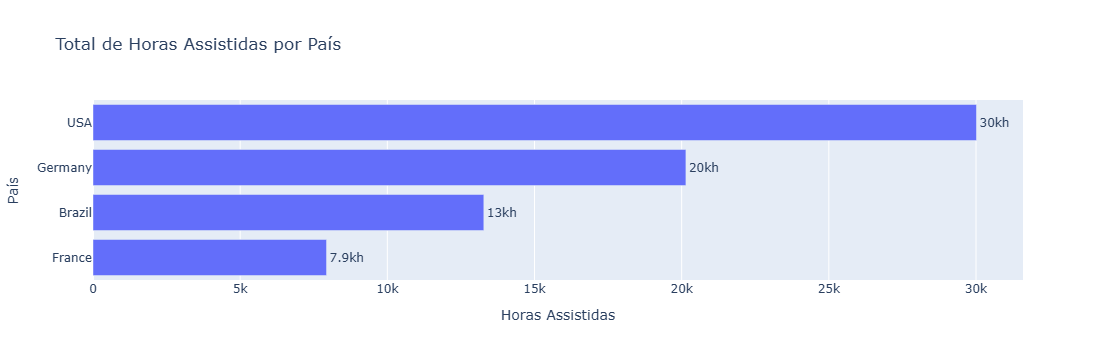

In [35]:
# horas assistidas
listaAnime = BaseAnimes[['Country_Most_Views', 'Total_Hours_Watched']] \
    .groupby('Country_Most_Views') \
    .sum() \
    .sort_values(by='Total_Hours_Watched', ascending=False)
listaAnime.index.name = 'Country_Most_Views'
listaAnime = listaAnime.reset_index()

# gráfico em barras
fig = px.bar(
    listaAnime,
    x='Total_Hours_Watched',
    y='Country_Most_Views',
    orientation='h',
    title='Total de Horas Assistidas por País',
    labels={
        'Total_Hours_Watched': 'Horas Assistidas',
        'Country_Most_Views': 'País'
    },
    text='Total_Hours_Watched'
)

# países do maior para o menor consumo
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.update_traces(texttemplate='%{text:.2s}h', textposition='outside')
fig.show()

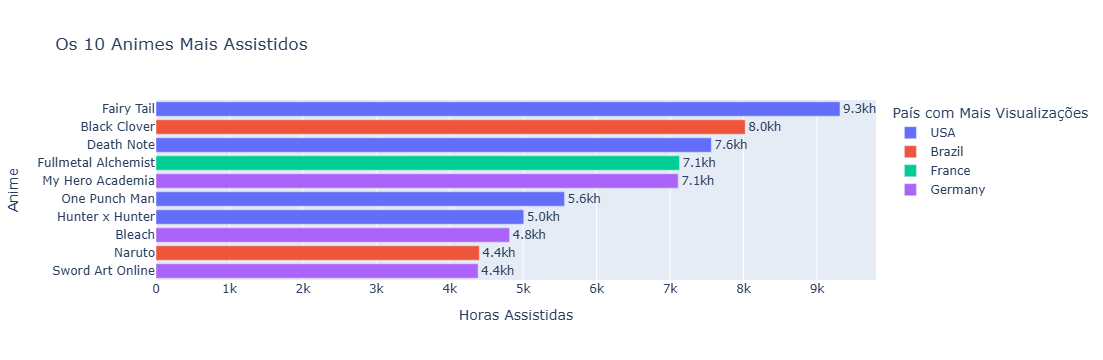

In [34]:
# Cria o gráfico de barras com Plotly Express
fig = px.bar(
    top_10_animes,
    x='Total_Hours_Watched',
    y='Name',
    color='Country_Most_Views',
    orientation='h',
    title='Os 10 Animes Mais Assistidos',
    labels={
        'Total_Hours_Watched': 'Horas Assistidas',
        'Name': 'Anime',
        'Country_Most_Views': 'País com Mais Visualizações'
    },
    text='Total_Hours_Watched'
)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_traces(texttemplate='%{text:.2s}h', textposition='outside')
fig.show()
